In [1]:
from IPython.display import HTML, display
from preprocess import read_preprocess_file
from tables import *
from plots import *
#load in the unmitigated simulation
baseline=read_preprocess_file('./model_outcomes'+'/new_baseline.csv')

#### Disclaimer: This report is a draft report from AI for Good Simulator on the COVID-19 situation in Moria camp, Lesbos, Greece. The insights are preliminary and they are subject to future model fixes and improvements.

# AI for Good Simulator Model Report for Moria Camp

## 0. Glossary 
* symptomatic cases
* hospitalisation person days
* critical condition person days
* deaths
* basic reproduction number

* make the plots do IQR instead of the full range because when the numbers dip below 0, it doesn't make sense.
* the notebook is too much information can be too intimitating for the non-tech people. maybe have this as a resource one to refer to and use another notebook as a powerpoint

## 1. Overview

This report provides simulation-based estimates for COVID-19 epidemic scenarios for the Moria camp, one of the largest refugee camps in Europe, located on Lesbos, an island in Greece. There are an estimated 20,000 people currently living in the camp. Through epidemiology simulations, we estimated peak counts, the timing of peak counts as well as cumulative counts for new symptomatic cases, hospitalisation demand person-days, critical care demand person-days and deaths for an unmitigated epidemic.  Then we compare the results with different combinations of intervention strategies in place to:
* Have a realistic estimate of the clinic capacity, PPE, ICU transfer and other supplies and logistical measures needed
* Compare the potential efficacies of different interventions and prioritise the ones that are going to help contain the virus.

## 2. Unmitigated COVID-19 Epidemic Trajectory

Here we assume the epidemic spreads through the camp without any non-pharmaceutical intervention in place and the peak incidence (number of cases), the timing and the cumulative case counts are all presented by interquartile range values (25%-75% quantiles) and they respectively represent the optimistic and pessimistic estimates of the spread of the virus given the uncertainty in parameters estimated from epidemiological studies. In the simulations we explore the basic reproduction number from 1 to 7 which covers from estimates in European and Asian settings to nearly what is estimated from a high population density location like a cruise ship. 

In [2]:
incidence_table_all=incidence_all_table(baseline);incidence_table_all

Outcome,Peak Day IQR,Peak Number IQR
Incidence of Symptomatic Cases,45-68,1410-2255
Hospitalisation Demand,52-76,45-67
Critical Care Demand,54-79,7-10
Incidence of Deaths,55-79,2-2


The peak number of infections is likely to be in the thousands which could easily overwhelm the care capacity of the normal clinics which occur one and half month after the virus first appears in the camp but the optimistic information is that according to hospitalisation,critical condition and incidence of death estimated based on the best available information currently, the peak hospitalisation demand will be 40-70 a day and the death estimate is based on the fact the patients require critical care will receive appropriate treatment from the 6 ICU beds that are currently available on Lesbos. The incidence of death could be the same as the peak critical care demand if oxygen therapy etc. won't be available for the refugee camp residents.

In [3]:
incidence_table_age=incidence_age_table(baseline);incidence_table_age

In table 2 the age breakdown for the peak incidence shows that during the peak infection, residents aged below 40 will comprise of more than 85% of the symptomatic infections while more than half of the people require hosptialisation on any given day will be above the age of 40. Noted that these estimated all point towards a month and half after the virus takes hold in the camp, giving local residents a period of time to react and try to curb the spread of the virus. Noted that the virus could be present in the camp without being noticed until the first death occurance which is projected to be one month after the virus arrives at the camp. 

In [4]:
comulative_table_all=cumulative_all_table(baseline);comulative_table_all

Totals,Counts
Symptomatic Cases,6451-7079
Hospital Person-Days,1750-2158
Critical Person-days,433-493
Deaths,59-68


Looking at the cumulative counts in the course of the simulation spanning 200 days since the arrival of the virus, more than one third of the camp residents are expected to be symptomatically infected by the virus and the total hospital person days will be over 1750 person days which places huge demand on the hospital. This can be translated into projected medical costs or time required if the medical cost and time taken is known for treating one patient for a day.

In [5]:
count_table_age=cumulative_age_table(baseline);count_table_age

The cumulative table for different disease status paints a similar picture compared to the peak incidence table where younger redisents account for most of the symptomatic infections but the older residents account for most of the hospitalisation/critical/death incidences. Most of the cases come from 2-3 months while in first months the number of symptomatically infected people could range from 100 to 1000.

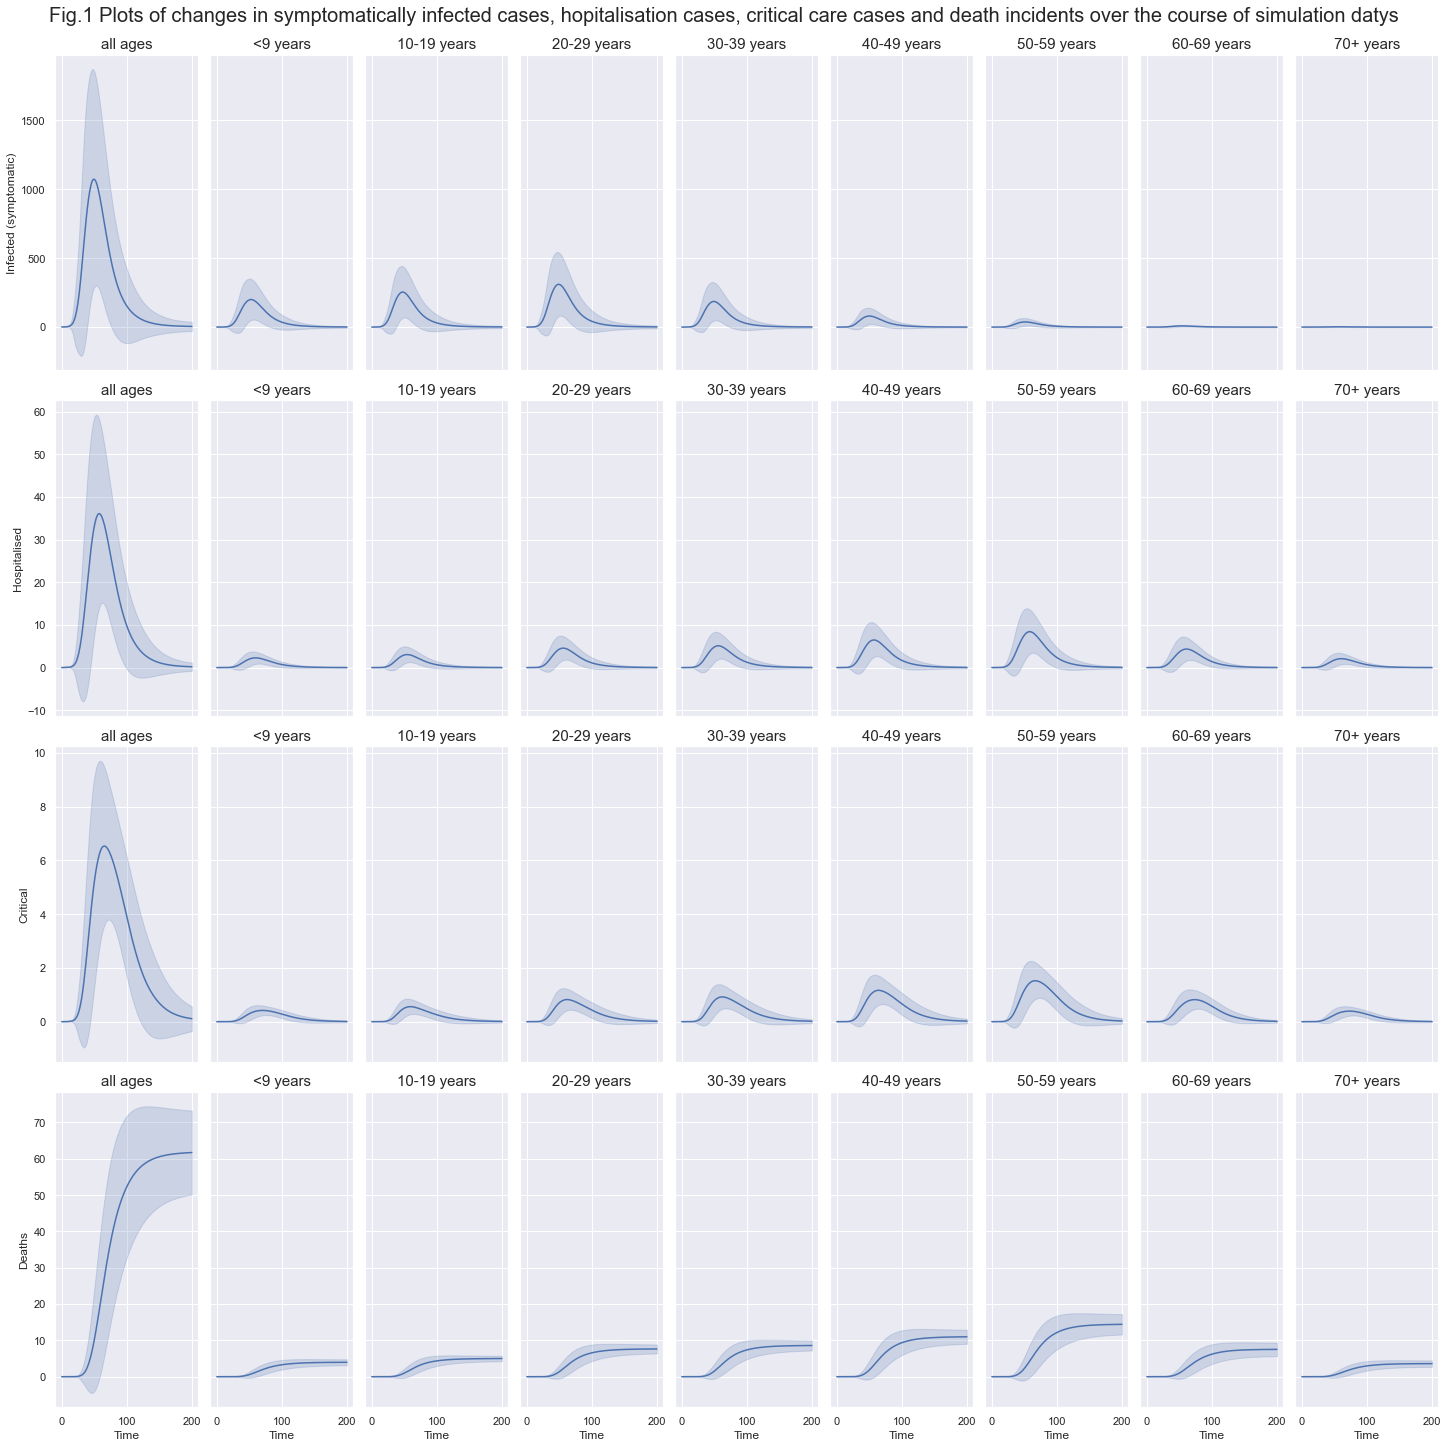

In [6]:
plot_by_age_all(baseline)

Visually comparing different age groups in different disease status, residents of age 50-59 are hit the hardest in terms of hopitatlisation, critical and deaths with residents of age 40-49 second in line. In terms of symptomatic infection, residents of age 20-29 are affected the worst with residents of age 10-19 second in line.

## 2. Invervention scenarios

### 2.1 Single intervention scenarios

We assumed these interventions are applied at the camp wide level and they are assumed to have full coverage starting from a certain day that is specified by the simulation and there are five interventions that are currently implemented. 

* Improved handwashing, better PPE equipment for everyone and other interventions that aim to reduce person-to-person transmission probabilities that is not location specific belongs to this first group of intervention. Here we set the effectiveness of the intervention as anther variable: 25% reduction in transmission rate: somewhat effective, 50% reduction: effective, 75% reduction: very effective.
* Move high-risk residents (age>70) offsite. Here we control the time periods that this is happening and the amount of high-risk people being moved off site each day during that tiem period.
* Isolate sympotomatically infected residents: here we assume the residents are qurantine in a seperate qurantine centre off site therefore the transmission between infected residents in these centres with anyone outside is cut off (we haven't factored in the case where detecting these individuals can have a period of delay and the isolation centres that are currently in place are inside the camp where people still share water points and toilets.)
* Build up ICU bed capacity: we know that on the island of Lesbos there are only 6 ICU beds currently available so we explore the case of building up the ICU beds to 100 to see how that can have an effect. This will only have an impact on the death rate as this won't stop the contagion from spreading within the camp (in reality the ICU bed capacity requirement can be easily tracked through critical cases outlined in the previous section where patients require a treatment package.)
* Shielding: where the high risk residents (>60 year olds) are housed in a green zone in the camp facility and they self-manage the sector while the entry into the greenzone is limited so the contact between older residents and younger residents are reduced.


High level summary of each intervention's effect on the epidemic:
* Reducing individual level transmission via social distancing, masks and regular handwashing can result in decreasing up to 20% of all cases in the most optimistic scenario. Prioritising a longer, sustained program is arguably more important than prioritising a short-lived stringent program as it demonstrates that if a program is only effective for 1-2 months, it has minimal effect on curbing the cumulative number of the infectious cases other than delaying the peak infections by a few days.
* Removing high risk residents offsite early will not impact the total number of people infected but will reduce the hospitalisation need, critical care need and death incidences onsite by 10%.
* Isolating symptomatically infected people until they are recovered (still need more investigation and tweaking) currently suggests that the capacity of the isolation centre is less important than having a long and rigorous surveilance program (one such program aims to isolate 10 people per day) (need further tweaking to see how much impact this have on the total number of people infected)

The % net reduction to cases, deaths, and hospitalised person­days in these scenarios, 200 days after initial introduction in Moria

The plot below shows the top 5 single intervention scenarios for reducing peak numbers in each state in descending order:
* Commiting to the long-term 'isolation the symptomatically infected people' can help curb the epidemic in all categories and potentially coupled with contact tracing to encourage self-isolation of asymptomatically infected people who are in touch with them can further drive the numbers down.
* Commiting to the long-term social distancing/mask/handwashing can help curb the virus tremendously but we need to benchmark the effectiveness of these approaches (possibly by motion tracking or random surveys)
* Removing high risk residents have a big impact on driving on the death numbers and we have yet to model the effect of removing uncompanied children off the island.

In [7]:
plot_one_intervention_vertical_interactive(plot_one_intervention_vertical)

interactive(children=(Select(description='Category:', options=('Infected (symptomatic)', 'Hospitalised', 'Crit…

### 2.1.1 Improved personal hygiene (social distancing/PPE/regular handwashing)

We are exploring two factors here:
* How effective the intervention measures will have to be the reduce the spread of the virus?
* How long the measures will have to be in place for them to be effective

In [8]:
effectiveness_cum_table_hygiene(baseline,timing=True)

,reduce transmission by 30% by social distancing/mask/handwashing from day 0 to day 30,reduce transmission by 30% by social distancing/mask/handwashing from day 0 to day 60,reduce transmission by 30% by social distancing/mask/handwashing from day 0 to day 90,reduce transmission by 30% by social distancing/mask/handwashing from day 0 to day 200
Total,,,,
Symptomatic Cases,0%~0%,1%~2%,5%~7%,9%~20%
Hospital Person-Days,0%~0%,1%~2%,5%~7%,12%~21%
Critical Person-days,0%~0%,-3%~-2%,-5%~-5%,0%~1%
Deaths,0%~0%,2%~3%,8%~10%,13%~29%


Here we explore how the duration of implementing such measures could have an impact on the number of cases reduced and lives saved. Clearly the longer the better personal hygiene meause are in place the better. Interesting to note that, if these improving hygiene measures are only implemented during the nascent period of the virus (first month) it won't have an impact on the spreak of the virus at all. 2 months of applying the measures will yield a minimal reduce in accumulative numbers while implementing for 3+ months can really start yielding promising results in curbing the spread of the virus

In [9]:
effectiveness_peak_table_hygiene(baseline,timing=True)

Here we explore how such measures can have an impact on the peak incidences and the days in which they occur. Note that a short-lived measure can delay the onset of the epidemic by 10 days while a longer lasting control measure can delay the epidemic by more than 2 weeks while reducing the peak incidences of symptomatic infections by a third.

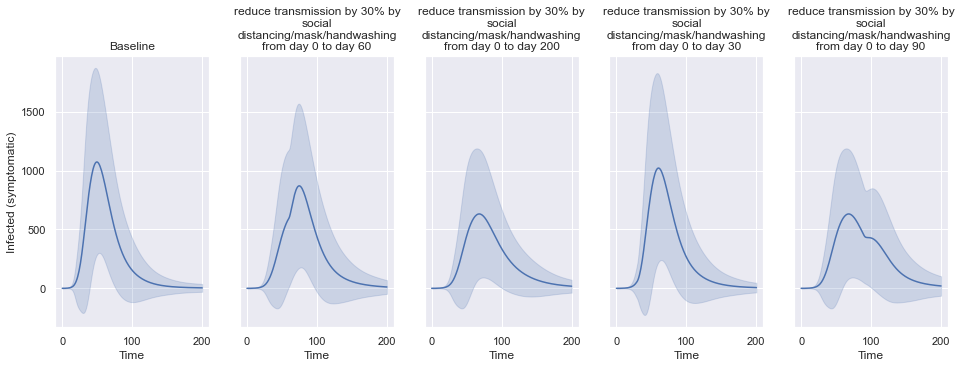

In [10]:
plot_hygiene_intervention_horizontal(baseline)
#plot needs be fixed (the order is wrong)

In [11]:
effectiveness_cum_table_hygiene(baseline,timing=False)

,reduce transmission by 30% by social distancing/mask/handwashing from day 0 to day 200,reduce transmission by 20% by social distancing/mask/handwashing from day 0 to day 200,reduce transmission by 10% by social distancing/mask/handwashing from day 0 to day 200
Total,,,
Symptomatic Cases,9%~20%,5%~11%,2%~5%
Hospital Person-Days,12%~21%,7%~11%,3%~5%
Critical Person-days,0%~1%,-1%~0%,0%~0%
Deaths,13%~29%,7%~15%,3%~7%


Here we explore how strict these hygiene measures should be and quite rightly so, the better you can do it, the better the results in minimising the impact of the virus. (Further points - how large should the program cover in the total population and what if some people conform and other people disobey social distancing/masks/hand washing)

In [12]:
effectiveness_peak_table_hygiene(baseline,timing=False)

A stricter measure can delay the onset of the epidemic by more than two weeks contrasting with less than a week from a less strict measure.

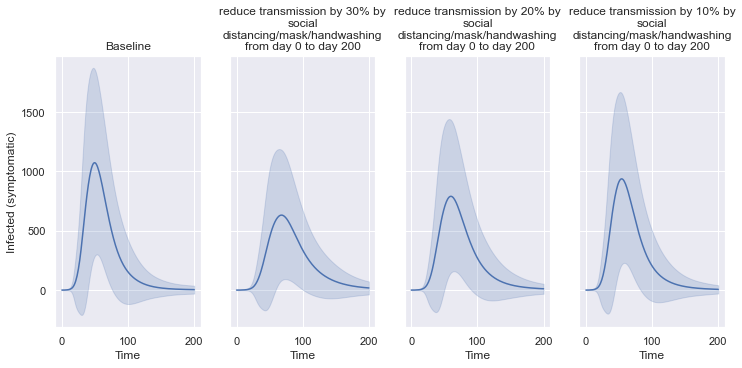

In [13]:
plot_hygiene_intervention_horizontal(baseline,timing=False)

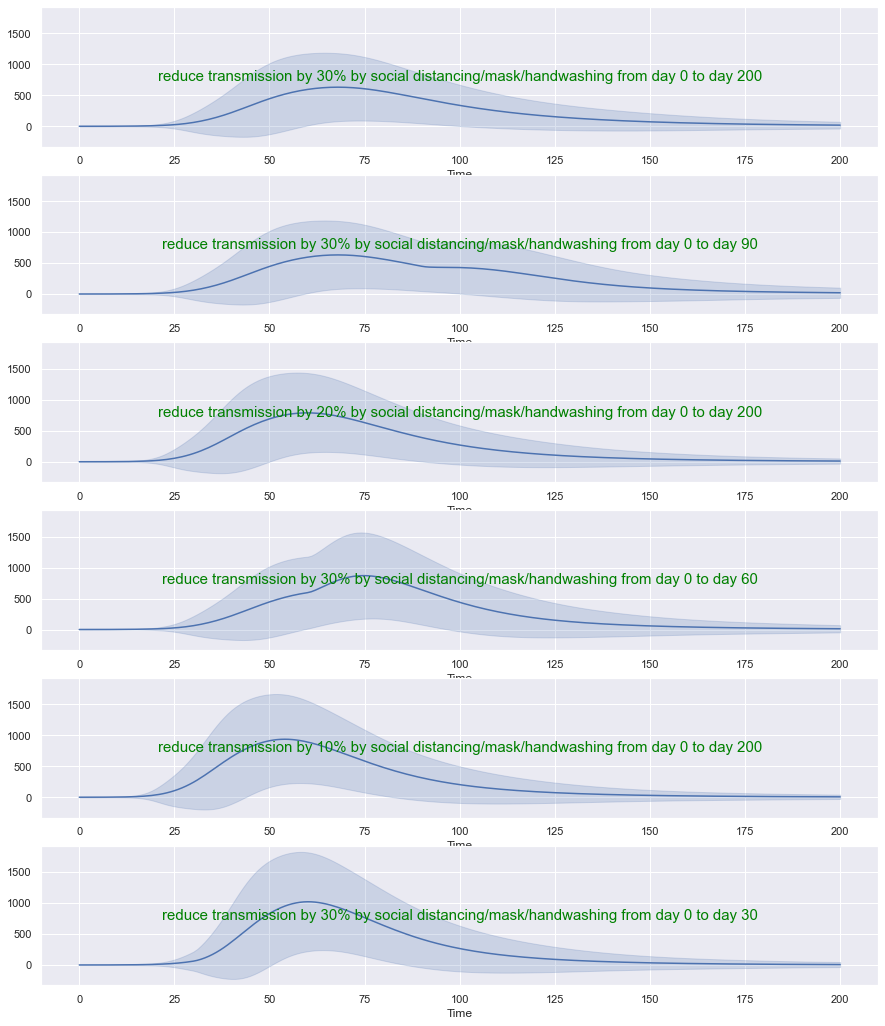

In [14]:
plot_onetype_intervention_vertical('hygiene')

### 2.1.2 Move high risk residents off-site

Here we assume that there are about 600 residents within the camp who can be classified as high risk (>age 60) so they should go into self-shielding or be moved off-site. We explore removing these residents at different rate and how that can have an impact on the epidemic.

In [15]:
effectiveness_cum_table_onetype(baseline,'highrisk')

,remove 100 high-risk residents from day 0 to day 6,remove 20 high-risk residents from day 0 to day 30,remove 50 high-risk residents from day 0 to day 12
Total,,,
Symptomatic Cases,-3%~-2%,-3%~-2%,-3%~-2%
Hospital Person-Days,15%~16%,16%~17%,16%~17%
Critical Person-days,9%~10%,10%~10%,10%~10%
Deaths,17%~19%,17%~19%,17%~19%


In [16]:
effectiveness_peak_table_onetype(baseline,'highrisk')

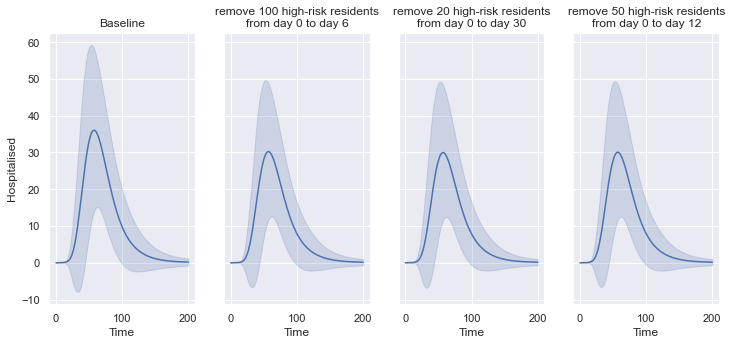

In [17]:
plot_onetype_intervention_horizontal(baseline,'highrisk','Hospitalised')

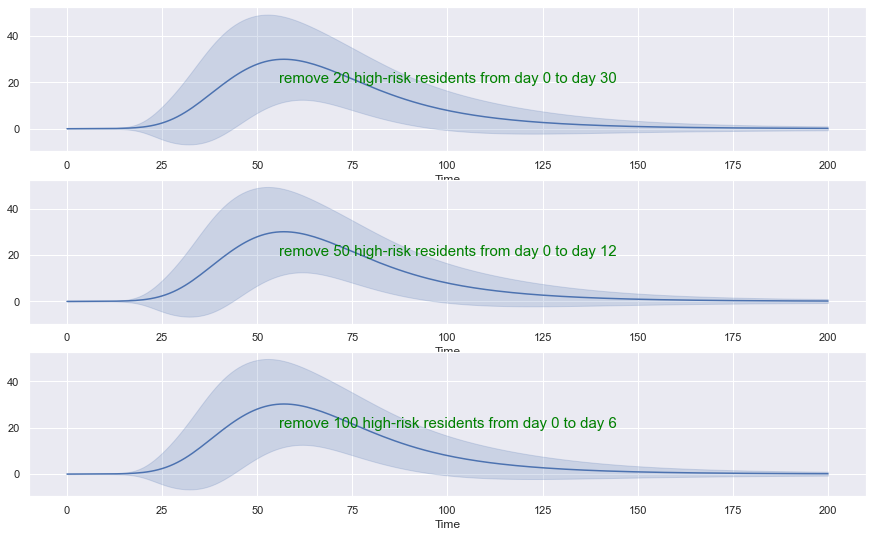

In [18]:
plot_onetype_intervention_vertical('highrisk','Hospitalised')

### 2.1.3 Isolate sympotomatically infected residents

Here we explore this intervention along two dimensions:
* the capacity at which we can make sure the infected residents are isolated (5%,10%,20%,35%)
* the detection/isolation rate at which such intervention is carried out (10,50,100 people per day)

In [19]:
effectiveness_cum_table_iso(baseline)

,isolate symptomatically infected people at 50 people per day for 20 days,isolate symptomatically infected people at 50 people per day for 40 days,isolate symptomatically infected people at 50 people per day for 80 days,isolate symptomatically infected people at 50 people per day for 120 days
Total,,,,
Symptomatic Cases,0%~0%,0%~0%,0%~0%,1%~22%
Hospital Person-Days,0%~0%,0%~0%,1%~7%,7%~68%
Critical Person-days,1%~1%,2%~2%,3%~11%,7%~73%
Deaths,0%~0%,0%~2%,1%~10%,7%~80%


In [20]:
effectiveness_peak_table_iso(baseline)

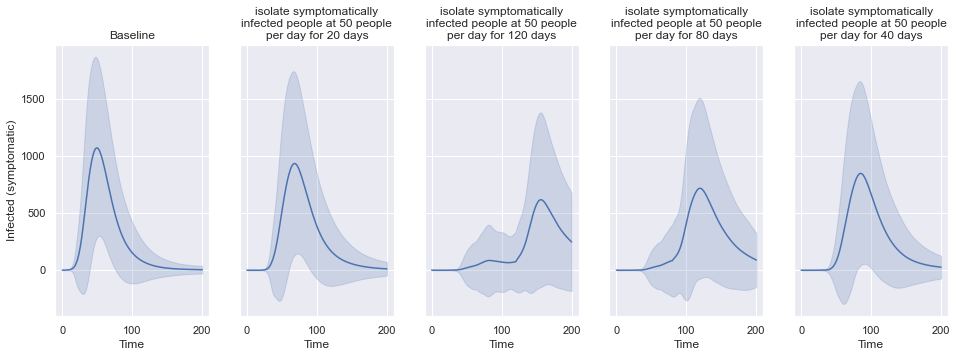

In [21]:
plot_iso_intervention_horizontal(baseline)
# need to fix the ordering of the plot

In [22]:
effectiveness_cum_table_iso(baseline,timing=False)

,isolate symptomatically infected people at 100 people per day for 20 days,isolate symptomatically infected people at 50 people per day for 40 days,isolate symptomatically infected people at 10 people per day for 200 days
Total,,,
Symptomatic Cases,0%~0%,0%~0%,1%~100%
Hospital Person-Days,0%~0%,0%~0%,10%~100%
Critical Person-days,1%~1%,2%~2%,12%~100%
Deaths,0%~0%,0%~2%,3%~100%


In [23]:
effectiveness_peak_table_iso(baseline,timing=False)

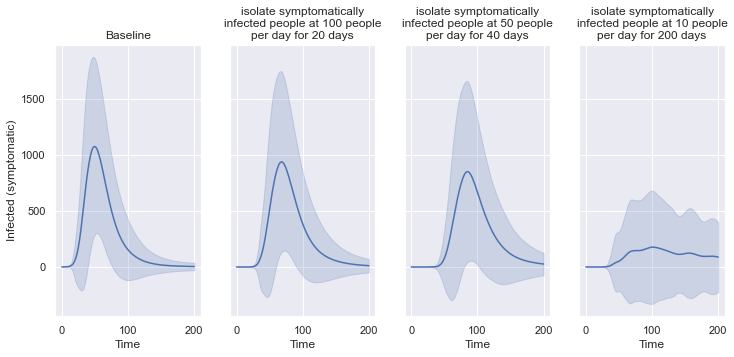

In [24]:
plot_iso_intervention_horizontal(baseline,timing=False)

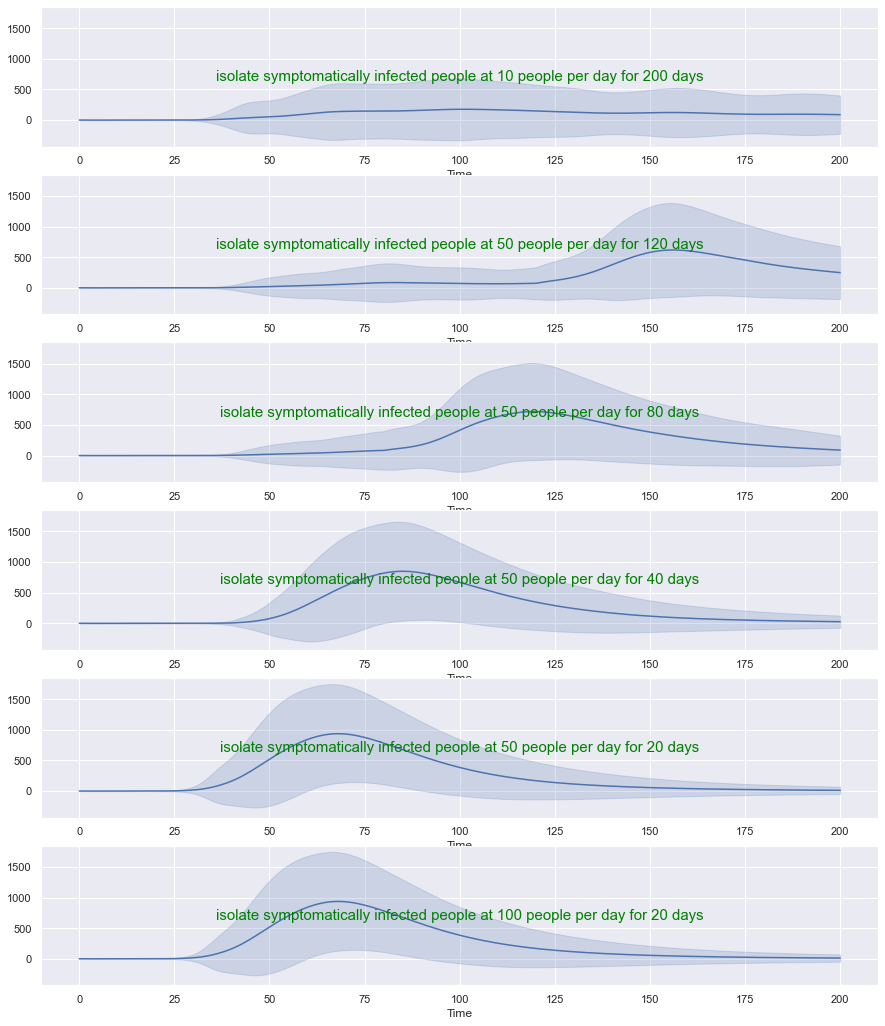

In [25]:
plot_onetype_intervention_vertical('iso')

### 2.1.3 Build up ICU bed capacity

In [26]:
effectiveness_cum_table_onetype(baseline,'icu')

,increase ICU capacity from 6 to 12,increase ICU capacity from 6 to 24,increase ICU capacity from 6 to 48
Total,,,
Symptomatic Cases,0%~0%,0%~0%,0%~0%
Hospital Person-Days,-2%~-2%,-4%~-4%,-4%~-4%
Critical Person-days,-40%~-38%,-67%~-56%,-67%~-56%
Deaths,6%~7%,8%~10%,8%~10%


In [27]:
effectiveness_peak_table_onetype(baseline,'icu')

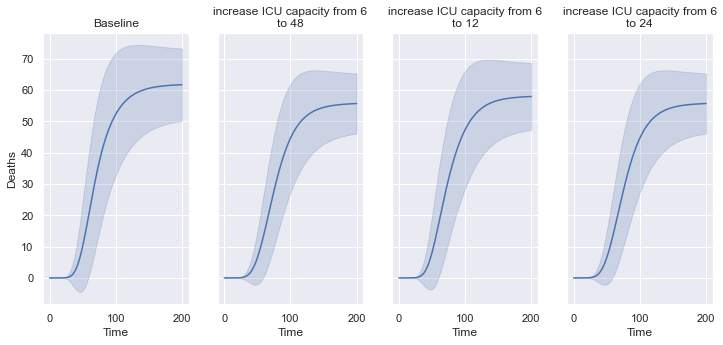

In [28]:
plot_onetype_intervention_horizontal(baseline,'icu','Deaths')

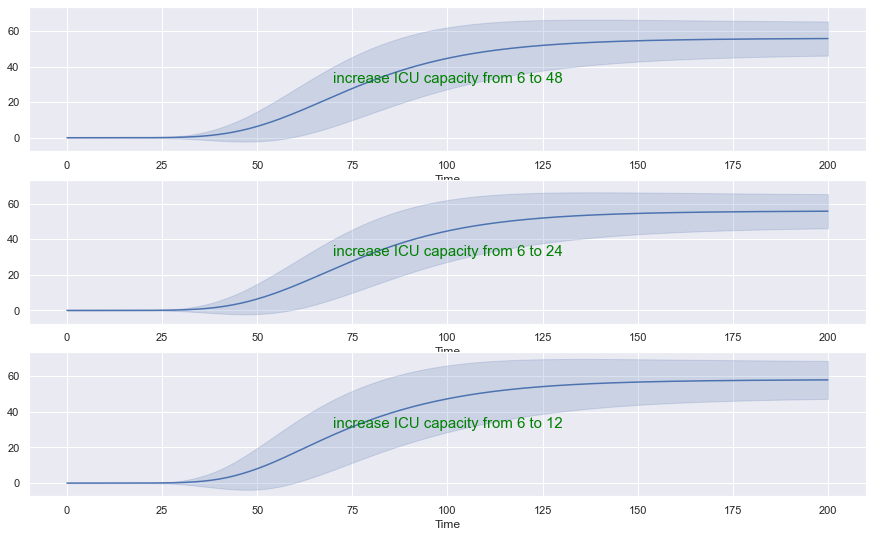

In [29]:
plot_onetype_intervention_vertical('icu','Deaths')

### 2.1.4 Shielding

In [30]:
effectiveness_cum_table_onetype(baseline,'shielding')

,shielding
Total,
Symptomatic Cases,-13%~-4%
Hospital Person-Days,-10%~-7%
Critical Person-days,6%~7%
Deaths,-17%~-6%


In [31]:
effectiveness_peak_table_shielding(baseline)

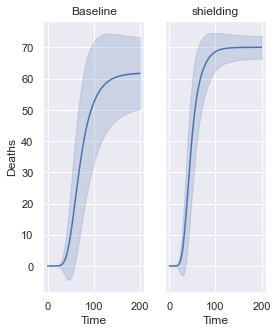

In [32]:
plot_onetype_intervention_horizontal(baseline,'shielding','Deaths')

In [33]:
#distill each predominant feature from each intervention to design something that can have the best impact

In [34]:
plot_intervention_comparison_interactive(plot_intervention_comparison,baseline)

### 2.2 Onto designing multi-intervention strategies

(draft conclusion) Here we explore the effect of a single intervention and the combination of one,two,three,four or even five interventions altogether. It should become clear that though some interventions are more effective than others in driving down peak counts, a combination of effective intervention strategy is the best